In [5]:
% some housekeeping stuff
register_graphics_toolkit ("gnuplot");
available_graphics_toolkits ();
graphics_toolkit ("gnuplot")
clear
% end of housekeeping

# Weak-Strong Titrations and Buffering

If you start with 0.01 M acetic acid (pKa=4.75) the initial pH will be 3.38 (solved in class).  As you add strong base the pH will increase.  Neutralizing the acid in this way is called titration.  At any point during the titration the charge balance must be satisfied ...

$[\mathrm{H}^+]+[\mathrm{Na}^+]=[\mathrm{OH}^-]+[\mathrm{Ac}^-]$

Using K$_w$ and K$_a$ (alpha expression) we can write this in terms of H+ and $Ac_T$

$[\mathrm{H}^+]+[\mathrm{Na}^+]=\dfrac{K_w}{[\mathrm{H}^+]}+\dfrac{Ac_TK_a}{[\mathrm{H}^+]+K_a}$

We can assume that the concentration of the added base is high enough that we can ignore dilution so $Ac_T$ = 0.01 M, for the entire titration (if we knew the volumes we could calculate the exact concentration of this strong acid anion, but I am trying to keep the calculations simple and illustrate the principles of titration and buffering, and electroneutrality).  

So with total acetate and Ka known we have just two variables, the sodium concentration and the proton concentration.  If we set one variable we have one equation and one unknown and we can solve it.  To make a graph of the pH versus added sodium it is actually easier to fix pH ($[\mathrm{H}^+]$) and solve for $[\mathrm{Na}^+]$. So by rearranging the electroneutrality we can write 

$[\mathrm{Na}^+]=\dfrac{K_w}{[\mathrm{H}^+]}+\dfrac{Ac_TK_a}{[\mathrm{H}^+]+K_a}-[\mathrm{H}^+]$

In the code below we'll do this calculation and plot the titration curve

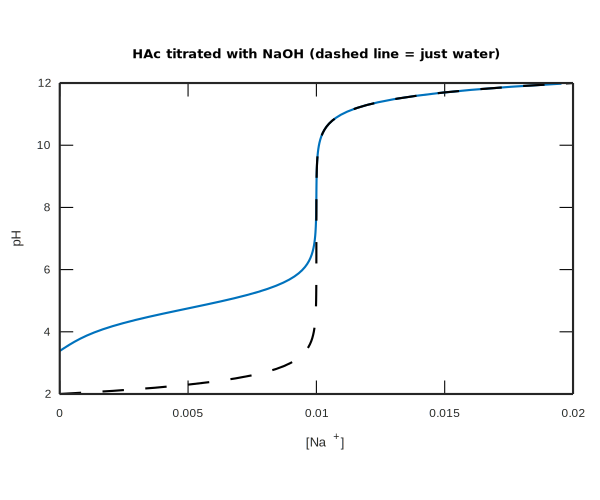

In [2]:
%plot -s 600,500 -f 'svg'
Kw=1e-14; pH=3.38:0.1:12; H=10.^-pH; OH=Kw./H; AcT=0.01; Ka=10^-4.75;
Na=OH+(AcT*Ka)./(Ka+H)-H;
plot(Na,pH,'linewidth',2); xlabel('[Na^+]'); ylabel('pH')
set(gca,'fontsize',11,'linewidth',2)
title('HAc titrated with NaOH (dashed line = just water)')
axis([0 0.02 2 12])

% add strong strong for comparison
pHs=2:0.1:12; Hs=10.^-pHs; OHs=Kw./Hs; Nas=OHs+AcT-Hs; 
hold on; plot(Nas,pHs,'k--','linewidth',2)

Buffering is the ability to resist change.  It does not just apply to pH, but pH is our example here.  So we can think of the buffering as the amount of base (NaOH) needed to cause a significant change in the pH.  If we need a lot of base to cause a pH change then we are well buffered, if only small additions of base cause pH change then we are poorly buffered.  In the titration curve you can see the acidic and basic ends of the curve are well buffered (because they are fairly flat), around neutrality there is poor buffering though because small concentration changes in sodium cause large pH changes.

To make buffering quantitative buffer capacity ($\beta$) is defined as the derivative of sodium concentration with respect to pH.

$ \beta = \dfrac{d[\mathrm{Na}^+]}{d\mathrm{pH}}$

If we do this differentiation (not super easy because or equation is in terms of H but our derivative is in terms of pH, you need the chain rule.  I will skip typing out the derivation here).

$ \beta = 2.3030 \left(\dfrac{K_w}{[\mathrm{H}^+]}+[\mathrm{H}^+]+\dfrac{Ac_TK_a[\mathrm{H}^+]}{([\mathrm{H}^+]+K_a)^2}\right)$

you can see that when proton or hydroxide are high the solution will be more well buffered (like our strong strong case).  We also have maximal buffering when pH=pKa.  Here is a plot (determined using numerical differentiation).

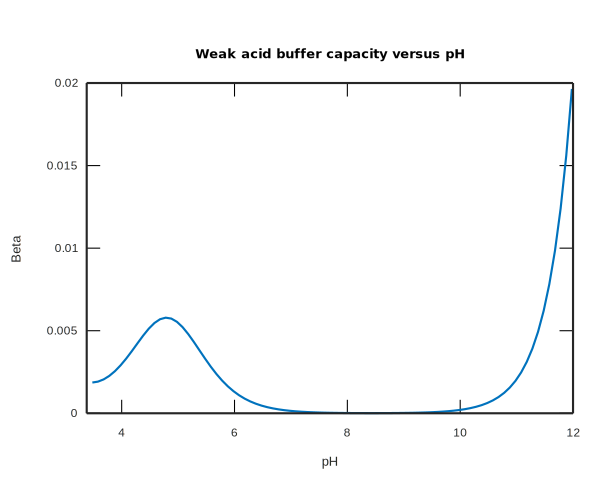

In [3]:
%plot -s 600,500 -f 'svg'
beta=diff(Na)./diff(pH);
n=size(pH,2); pHder=pH(1:n-1)+diff(pH);
plot(pHder,beta,'linewidth',2)
xlabel('pH'); ylabel('\Beta')
set(gca,'linewidth',2,'fontsize',11)
title('Weak acid buffer capacity versus pH')
axis([3.38 12 0 0.02])

In the middle of the titration the buffer capacity is so low we can't see the values.  A "trick" to be able to "see" the curve in a situation like this is to plot the logarithm of the quantity instead of the quantity itself.

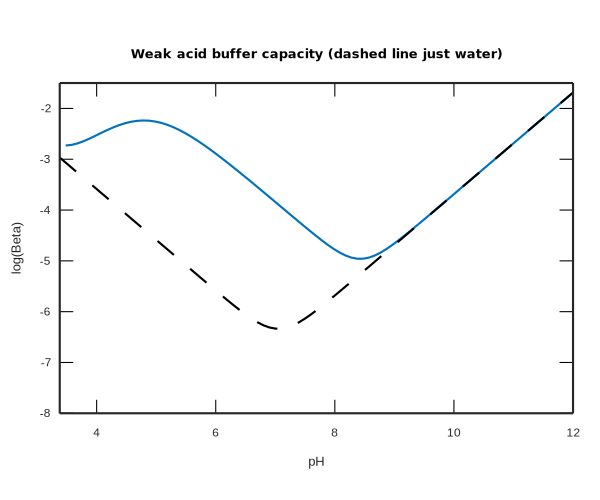

In [4]:
%plot -s 600,500 -f 'svg'
plot(pHder,log10(beta),'linewidth',2)
xlabel('pH'); ylabel('log(\Beta)')
set(gca,'linewidth',2,'fontsize',11)
title('Weak acid buffer capacity (dashed line just water)')
axis([3.38 12 -8 -1.5])
hold on
betas=diff(Nas)./diff(pHs);
n=size(pHs,2); pHders=pHs(1:n-1)+diff(pHs);
plot(pHders,log10(betas),'k--','linewidth',2)